# Implementation of K-NN algorithm with Pima diabetes Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the KNN class
class KNN:
    def __init__(self, k=5):
        self.k = k

    def dist(self, x):
        distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        print(distances)
        
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return self.most_common_label(k_nearest_labels)

    def most_common_label(self, labels):
        label_count = {}
        for label in labels:
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
        most_common_labels = max(label_count,key=label_count.get)
        return most_common_labels 

In [3]:
# Load the Pima Diabetes dataset
df= pd.read_csv('diabetes.csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x = df.iloc[:, :-1]
y=df.iloc[:,-1]

In [6]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#train the KNN model
k = 5
model = KNN(k=k)
model.fit(x_train, y_train)

In [10]:
# predictions on the test set
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model (k={k}): {accuracy * 100:.2f}%")

Accuracy of KNN model (k=5): 66.88%


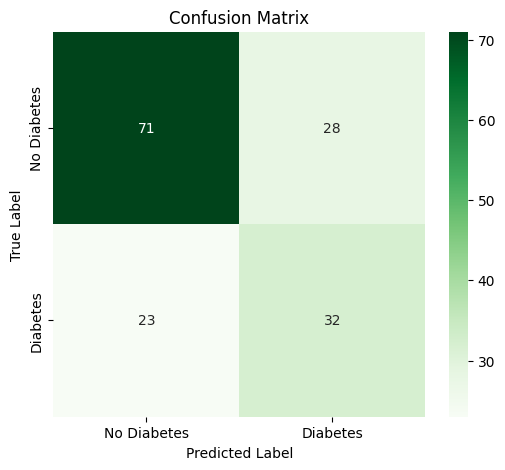

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
